이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 여러가지 유사도 기법 튜토리얼 자료입니다.

링크 : https://wikidocs.net/24654

## **05-02 여러가지 유사도 기법**
---
문서의 유사도를 구하기 위한 방법으로는 코사인 유사도 외에도 여러가지 방법들이 있습니다. 여기서는 문서의 유사도를 구할 수 있는 다른 방법들을 학습합니다.

---
### **1. 유클리드 거리(Euclidean distance)**

유클리드 거리(euclidean distance)는 문서의 유사도를 구할 때 자카드 유사도나 코사인 유사도만큼, 유용한 방법은 아닙니다. 하지만 여러 가지 방법을 이해하고, 시도해보는 것 자체만으로 다른 개념들을 이해할 때 도움이 되므로 의미가 있습니다.

다차원 공간에서 두개의 점 $p$와 $q$가 각각 $p=(p_{1}, p_{2}, p_{3}, ... , p_{n})$ 과 $q=(q_{1}, q_{2}, q_{3}, ..., q_{n})$ 의 좌표를 가질 때 두 점 사이의 거리를 계산하는 유클리드 거리 공식은 다음과 같습니다.  
  
$$\sqrt{(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\ ...\ +(q_{n}-p_{n})^{2}}=\sqrt{\sum_{i=1}^{n}(q_{i}-p_{i})^{2}}$$   


다차원 공간이라고 가정하면, 처음 보는 입장에서는 식이 너무 복잡해보입니다. 좀 더 쉽게 이해하기위해서 2차원 공간이라고 가정하고 두 점 사이의 거리를 좌표 평면 상에서 시각화해보겠습니다.
  
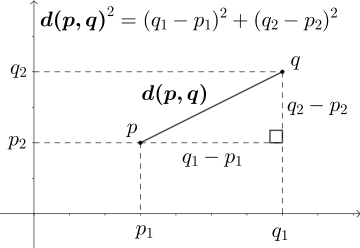


2차원 좌표 평면 상에서 두 점 $p$와 $q$와 사이의 직선 거리를 구하는 문제입니다. 위의 경우에는 직각 삼각형으로 표현이 가능하므로, 중학교 수학 과정인 피타고라스의 정리를 통해 $p$와 $q$ 사이의 거리를 계산할 수 있습니다. 즉, 2차원 좌표 평면에서 두 점 사이의 유클리드 거리 공식은 피타고라스의 정리를 통해 두 점 사이의 거리를 구하는 것과 동일합니다.

다시 원점으로 돌아가서 여러 문서에 대해서 유사도를 구하고자 유클리드 거리 공식을 사용한다는 것은, 앞서 본 2차원을 단어의 총 개수만큼의 차원으로 확장하는 것과 같습니다. 예를 들어 아래와 같은 DTM이 있다고 합시다.

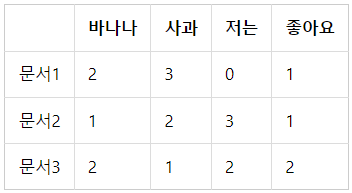

단어의 개수가 4개이므로, 이는 4차원 공간에 문서1, 문서2, 문서3을 배치하는 것과 같습니다. 이때 다음과 같은 문서Q에 대해서 문서1, 문서2, 문서3 중 가장 유사한 문서를 찾아내고자 합니다.

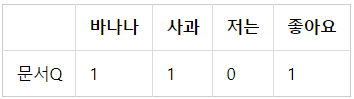

이때 유클리드 거리를 통해 유사도를 구하려고 한다면, 문서Q 또한 다른 문서들처럼 4차원 공간에 배치시켰다는 관점에서 4차원 공간에서의 각각의 문서들과의 유클리드 거리를 구하면 됩니다. 이를 파이썬 코드로 구현해보겠습니다.

In [2]:
import numpy as np

In [3]:
## L2 Norm
def dist(x, y):   
    return np.sqrt(np.sum((x - y)**2))

doc1 = np.array((2, 3, 0, 1))
doc2 = np.array((1, 2, 3, 1))
doc3 = np.array((2, 1, 2, 2))

docQ = np.array((1, 1, 0, 1))

print('문서1과 문서Q의 거리 :', dist(doc1, docQ))
print('문서2과 문서Q의 거리 :', dist(doc2, docQ))
print('문서3과 문서Q의 거리 :', dist(doc3, docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


유클리드 거리의 값이 가장 작다는 것은 문서 간 거리가 가장 가깝다는 것을 의미합니다. 즉, 문서1이 문서Q와 가장 유사하다고 볼 수 있습니다.

---
### **2. 자카드 유사도(Jaccard similarity)**

A와 B 두개의 집합이 있다고 합시다. 이때 교집합은 두 개의 집합에서 공통으로 가지고 있는 원소들의 집합을 말합니다. 즉, **합집합에서 교집합의 비율** 을 구한다면 두 집합 A와 B의 유사도를 구할 수 있다는 것이 **자카드 유사도(jaccard similarity)** 의 아이디어입니다. 자카드 유사도는 0과 1사이의 값을 가지며, 만약 **두 집합이 동일하다면 1** 의 값을 가지고, 두 집합의 **공통 원소가 없다면 0** 의 값을 갖습니다. 자카드 유사도를 구하는 함수를 $J$라고 하였을 때, 자카드 유사도 함수 $J$는 아래와 같습니다.

 


$$J(A,B)=\frac{|A∩B|}{|A∪B|}=\frac{|A∩B|}{|A|+|B|-|A∩B|}$$

두 개의 비교할 문서를 각각 $doc_{1}$, $doc_2$ 
라고 했을 때 $doc_1$과 $doc_2$의 문서의 유사도를 구하기 위한 자카드 유사도는 이와 같습니다.  
  
$$J(doc_{1},doc_{2})=\frac{doc_{1}∩doc_{2}}{doc_{1}∪doc_{2}}$$



두 문서 $doc_1$, $doc_2$ 사이의 자카드 유사도 $J(doc_1, doc_2)$는 두 집합의 교집합 크기를 두 집합의 합집합 크기로 나눈 값으로 정의됩니다. 간단한 예를 통해서 이해해보겠습니다.

In [4]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

## 토큰화화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :', tokenized_doc1)
print('문서2 :', tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


문서1과 문서2의 합집합을 구해보겠습니다.

In [5]:
## 합집합
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :', union)

문서1과 문서2의 합집합 : {'coupon', 'love', 'you', 'banana', 'passport', 'apple', 'card', 'like', 'everyone', 'likey', 'holder', 'watch'}


문서1과 문서2의 합집합의 단어의 총 개수는 12개입니다. 이제 문서1과 문서2의 교집합을 구해보겠습니다. 문서1과 문서2에서 둘 다 등장한 단어를 찾으면 됩니다.

In [6]:
## 교집합
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :', intersection)

문서1과 문서2의 교집합 : {'banana', 'apple'}


문서1과 문서2에서 둘 다 등장한 단어는 banana와 apple 총 2개입니다. 이제 교집합의 크기를 합집합의 크기로 나누면 자카드 유사도가 계산됩니다.

In [7]:
print('자카드 유사도 :', len(intersection) / len(union))

자카드 유사도 : 0.16666666666666666
